In [51]:
pip install gpxpy

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gpxpy
import gpxpy.gpx

In [53]:
def safe_to_timedelta(time_value):
    """
    Safely converts a time value to a pandas Timedelta.

    Args:
        time_value: The time value to convert (string or numeric).

    Returns:
        A pandas Timedelta object, or pd.NaT if conversion fails.
    """
    try:
        return pd.to_timedelta(time_value)
    except ValueError:
        print(f"Warning: Could not convert '{time_value}' to timedelta.")
        return pd.NaT

def timedelta_to_hms(td):
    """Converts a timedelta object to HH:MM:SS format."""
    total_seconds = int(td.total_seconds())
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    return f"{hours:02}:{minutes:02}:{seconds:02}"


In [54]:
file_path = r"C:\Users\Steph\OneDrive\Desktop\steamboat_race_results.csv"
steamboat_df = pd.read_csv(file_path)
steamboat_df = pd.DataFrame(steamboat_df)

In [55]:
steamboat_df.head()

,name,bib,gender,overall_time_ms,overall_time_readable,Full Course,13.1 Miles
0,Calvin Lehn,263,M,9522000,2:38:42,2:38:41,1:17:46
1,Brian Lozes,450,M,9896000,2:44:56,2:44:55,1:17:57
2,Liam Driscoll,166,M,10412000,2:53:32,2:53:31,1:21:25
3,Richard Powell,344,M,10533000,2:55:33,2:55:32,1:21:55
4,Nicholas Cady,137,M,11005000,3:03:25,3:03:23,1:26:22


In [56]:
file_path = r"C:\Users\Steph\OneDrive\Desktop\marathon_results_2024.csv"
boston_df = pd.read_csv(file_path)
boston_df = pd.DataFrame(boston_df)

In [57]:
# Print info about the steamboat dataframe
print("Steamboat dataframe before dropping the column")
steamboat_df.info()

# Convert 'overall_time_readable' to Timedelta
steamboat_df['Overall Time'] = steamboat_df['overall_time_readable'].apply(safe_to_timedelta)

# Drop ONLY the 'overall_time_ms' column
if 'overall_time_ms' in steamboat_df.columns:
    steamboat_df.drop(columns=['overall_time_ms'], inplace=True, errors='ignore')
    print("Dropped column 'overall_time_ms'")
else:
    print("Column 'overall_time_ms' not found. Not dropping any column.")

# Print info about the steamboat dataframe
print("Steamboat dataframe after dropping the column")
steamboat_df.info()

Steamboat dataframe before dropping the column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   254 non-null    object
 1   bib                    254 non-null    int64 
 2   gender                 254 non-null    object
 3   overall_time_ms        254 non-null    int64 
 4   overall_time_readable  254 non-null    object
 5   Full Course            254 non-null    object
 6   13.1 Miles             254 non-null    object
dtypes: int64(2), object(5)
memory usage: 14.0+ KB
Dropped column 'overall_time_ms'
Steamboat dataframe after dropping the column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   name                   254 non-

In [58]:
boston_df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 23
0,2,"Lemma, Sisay",33,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:21,...,1:11:44,1:26:56,1:42:56,1:58:51,0:04:49,-,2:06:17,1,1,1.0
1,8,"Esa, Mohamed",23,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:22,...,1:14:08,1:29:46,1:45:14,2:00:24,0:04:51,-,2:06:58,2,2,2.0
2,1,"Chebet, Evans",35,M,Kapsabet,NaN,KEN,NaN,NaN,0:14:21,...,1:14:05,1:29:45,1:45:10,2:00:13,0:04:52,-,2:07:22,3,3,3.0
3,7,"Korir, John",27,M,Eldoret,NaN,KEN,NaN,NaN,0:14:22,...,1:14:06,1:29:45,1:45:10,2:00:13,0:04:53,-,2:07:40,4,4,4.0
4,14,"Korir, Albert",30,M,Nairobi,NaN,KEN,NaN,NaN,0:14:22,...,1:14:06,1:29:45,1:45:10,2:00:45,0:04:53,-,2:07:47,5,5,5.0


In [59]:
boston_df.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace',
       'Proj Time', 'Official Time', 'Overall', 'Gender', 'Division',
       'Unnamed: 23'],
      dtype='object')

In [60]:
# Define columns to keep
columns_to_keep = ['Name', 'M/F', 'Half', 'Overall']  # Case-sensitive!

# Identify columns to drop
columns_to_drop = [col for col in boston_df.columns if col not in columns_to_keep]

# Drop the unwanted columns
if columns_to_drop:
    boston_df = boston_df.drop(columns=columns_to_drop, errors='ignore', axis=1)
    print("\nColumns Dropped:", columns_to_drop)
    print("\nNew boston_marathon_df Info:")
    boston_df.info()
else:
    print("\nNo columns to drop (all desired columns already present).")

print("\nHead of boston_marathon_df:")
boston_df.head()


Columns Dropped: ['Bib', 'Age', 'City', 'State', 'Country', 'Citizen', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Gender', 'Division', 'Unnamed: 23']

New boston_marathon_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25554 entries, 0 to 25553
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     25554 non-null  object
 1   M/F      25554 non-null  object
 2   Half     25554 non-null  object
 3   Overall  25554 non-null  object
dtypes: object(4)
memory usage: 798.7+ KB

Head of boston_marathon_df:


,Name,M/F,Half,Overall
0,"Lemma, Sisay",M,0:57:13,2:06:17
1,"Esa, Mohamed",M,0:59:00,2:06:58
2,"Chebet, Evans",M,0:58:52,2:07:22
3,"Korir, John",M,0:58:53,2:07:40
4,"Korir, Albert",M,0:58:54,2:07:47


In [61]:
print("\nSteamboat DataFrame Info:")
steamboat_df.info()
steamboat_df.describe()

print("\nBoston Marathon DataFrame Info:")
boston_df.info()
boston_df.describe()


Steamboat DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   name                   254 non-null    object         
 1   bib                    254 non-null    int64          
 2   gender                 254 non-null    object         
 3   overall_time_readable  254 non-null    object         
 4   Full Course            254 non-null    object         
 5   13.1 Miles             254 non-null    object         
 6   Overall Time           254 non-null    timedelta64[ns]
dtypes: int64(1), object(5), timedelta64[ns](1)
memory usage: 14.0+ KB

Boston Marathon DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25554 entries, 0 to 25553
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     25554 non-null  object
 1   M

,Name,M/F,Half,Overall
count,25554,25554,25554,25554
unique,25346,3,4952,9698
top,"Kelly, John",M,-,3:39:51
freq,6,14578,52,13


In [62]:
def clean_gender(gender):
    if isinstance(gender, str):
        return gender.upper().strip()[:1]
    return gender

for df_name, df in [('Steamboat', steamboat_df), ('Boston', boston_df)]:
    print(f"\nProcessing {df_name} DataFrame for gender column:")
    print(f"  Columns before gender processing: {df.columns.tolist()}")

    if 'M/F' in df.columns:
        df['gender'] = df['M/F'].apply(clean_gender)
        df.drop(columns=['M/F'], inplace=True, errors='ignore')
        print(f"  'M/F' column cleaned and renamed to 'gender'. Original 'M/F' column dropped.")
    elif 'gender' in df.columns:
        print("  'gender' column already exists (likely from a previous step). Skipping renaming.")
    else:
        print("  'M/F' column not found in this DataFrame.")

    print(f"  Columns after gender processing: {df.columns.tolist()}")

print("\nGender processing completed for both DataFrames.")
print("\nBoston DataFrame head with 'gender' column:")
print(boston_df[['gender']].head())
print("\nSteamboat DataFrame head with 'gender' column:")
print(steamboat_df[['gender']].head())


Processing Steamboat DataFrame for gender column:
  Columns before gender processing: ['name', 'bib', 'gender', 'overall_time_readable', 'Full Course', '13.1 Miles', 'Overall Time']
  'gender' column already exists (likely from a previous step). Skipping renaming.
  Columns after gender processing: ['name', 'bib', 'gender', 'overall_time_readable', 'Full Course', '13.1 Miles', 'Overall Time']

Processing Boston DataFrame for gender column:
  Columns before gender processing: ['Name', 'M/F', 'Half', 'Overall']
  'M/F' column cleaned and renamed to 'gender'. Original 'M/F' column dropped.
  Columns after gender processing: ['Name', 'Half', 'Overall', 'gender']

Gender processing completed for both DataFrames.

Boston DataFrame head with 'gender' column:
  gender
0      M
1      M
2      M
3      M
4      M

Steamboat DataFrame head with 'gender' column:
  gender
0      M
1      M
2      M
3      M
4      M


In [63]:
boston_df.columns

Index(['Name', 'Half', 'Overall', 'gender'], dtype='object')

In [64]:
steamboat_df.columns

Index(['name', 'bib', 'gender', 'overall_time_readable', 'Full Course',
       '13.1 Miles', 'Overall Time'],
      dtype='object')

In [65]:
# --- Apply to Steamboat DataFrame ---
if 'overall_time_readable' in steamboat_df.columns:
    steamboat_df['Overall Time'] = steamboat_df['overall_time_readable'].apply(safe_to_timedelta)
    print("\nSteamboat Marathon 'overall_time_readable' converted to timedelta")
    print(steamboat_df[['overall_time_readable', 'Overall Time']].head())
else:
    print("\nSteamboat Marathon DataFrame does not have an 'overall_time_readable' column to convert.")

# --- Apply to Boston DataFrame ---
if 'Overall' in boston_df.columns:
    boston_df['Overall Time'] = boston_df['Overall'].apply(safe_to_timedelta)
    print("\nBoston Marathon 'Overall Time' converted to timedelta")
    print(boston_df[['Overall', 'Overall Time']].head())
else:
    print("\nBoston Marathon DataFrame does not have an 'Official Time' column to convert.")


Steamboat Marathon 'overall_time_readable' converted to timedelta
  overall_time_readable    Overall Time
0               2:38:42 0 days 02:38:42
1               2:44:56 0 days 02:44:56
2               2:53:32 0 days 02:53:32
3               2:55:33 0 days 02:55:33
4               3:03:25 0 days 03:03:25

Boston Marathon 'Overall Time' converted to timedelta
   Overall    Overall Time
0  2:06:17 0 days 02:06:17
1  2:06:58 0 days 02:06:58
2  2:07:22 0 days 02:07:22
3  2:07:40 0 days 02:07:40
4  2:07:47 0 days 02:07:47


In [66]:
print("\n--- Missing Data Analysis ---")

# Function to analyze missing data in a DataFrame
def analyze_missing_data(df, df_name):
    print(f"\nDataFrame: {df_name}")
    print(df.isnull().sum())  # Count missing values per column
    print("\nMissing Data Percentage:")
    print(df.isnull().mean() * 100)  # Percentage of missing values per column

# Analyze missing data in both DataFrames
analyze_missing_data(steamboat_df, "Estes Park")
analyze_missing_data(boston_df, "Boston Marathon")


--- Missing Data Analysis ---

DataFrame: Estes Park
name                     0
bib                      0
gender                   0
overall_time_readable    0
Full Course              0
13.1 Miles               0
Overall Time             0
dtype: int64

Missing Data Percentage:
name                     0.0
bib                      0.0
gender                   0.0
overall_time_readable    0.0
Full Course              0.0
13.1 Miles               0.0
Overall Time             0.0
dtype: float64

DataFrame: Boston Marathon
Name            0
Half            0
Overall         0
gender          0
Overall Time    0
dtype: int64

Missing Data Percentage:
Name            0.0
Half            0.0
Overall         0.0
gender          0.0
Overall Time    0.0
dtype: float64


In [67]:

steamboat_male = steamboat_df[steamboat_df['gender'] == 'M'].copy()
steamboat_female = steamboat_df[steamboat_df['gender'] == 'F'].copy()

boston_male = boston_df[boston_df['gender'] == 'M'].copy()
boston_female = boston_df[boston_df['gender'] == 'F'].copy()

def safe_to_timedelta(time_value):
    """
    Safely converts a time value to a pandas Timedelta.

    Args:
        time_value: The time value to convert (string or numeric).

    Returns:
        A pandas Timedelta object, or pd.NaT if conversion fails.
    """
    try:
        return pd.to_timedelta(time_value)
    except ValueError:
        print(f"Warning: Could not convert '{time_value}' to timedelta.")
        return pd.NaT

def format_timedelta_describe(series):
    """Formats the describe() output of a Timedelta Series to HH:MM:SS."""
    description = series.describe()
    if series.dtype == 'timedelta64[ns]':
        description.iloc[1:] = description.iloc[1:].apply(lambda x: pd.to_timedelta(x).floor('s'))  # Floor to seconds
    return description

# --- Convert Time Columns ---
if 'Full Course' in steamboat_df:
    steamboat_df['Full Course'] = steamboat_df['Full Course'].apply(safe_to_timedelta)
    # --- ADDED CLEANING ---
    steamboat_df.dropna(subset=['Full Course'], inplace=True)  # Drop rows with NaT in 'Full Course'
    steamboat_df['Full Course'] = pd.to_timedelta(steamboat_df['Full Course'])  # Explicit conversion
if 'Overall Time' in boston_df:
    boston_df['Overall Time'] = boston_df['Overall Time'].apply(safe_to_timedelta)

# --- Calculate Descriptive Statistics ---
def calculate_descriptive_stats(df, race_name, gender, time_column):
    """Calculates and prints descriptive statistics for a specified time column."""

    print(f"\n--- {race_name} - {gender} ---")

    if time_column in df:
        print(f"\nOverall Time Statistics ({time_column}):")
        print(format_timedelta_describe(df[time_column]))

# Calculate and print statistics for each group
calculate_descriptive_stats(steamboat_male, "Steamboat", "Male", 'Full Course')
calculate_descriptive_stats(steamboat_female, "Steamboat", "Female", 'Full Course')
calculate_descriptive_stats(boston_male, "Boston", "Male", 'Overall Time')
calculate_descriptive_stats(boston_female, "Boston", "Female", 'Overall Time')

# --- Steamboat Comparisons ---
print("\n--- Steamboat Marathon - Gender Comparisons ---")

def safe_to_timedelta(time_str):
    """Safely converts a time string to timedelta, returning NaT on error."""
    try:
        return pd.to_timedelta(time_str)
    except ValueError:
        return pd.NaT  # Not a Time

def timedelta_to_hms(td):
    """Converts a timedelta object to HH:MM:SS format."""
    total_seconds = int(td.total_seconds())
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    return f"{hours:02}:{minutes:02}:{seconds:02}"

def visualize_distributions(df, race_name, gender, color, time_column, plot_type='both'):
    """Visualizes time distributions using histograms and box plots."""

    if time_column in df:
        plt.figure(figsize=(12, 6))

        if plot_type in ('hist', 'both'):
            # --- Time Histograms ---
            plt.subplot(1, 2, 1)
            time_data_for_hist = df[time_column]
            if df[time_column].dtype == '<m8[ns]':  # check if it's timedelta
                time_data_for_hist_seconds = time_data_for_hist.dt.total_seconds()
                sns.histplot(time_data_for_hist_seconds, kde=True, color=color, alpha=0.5, bins=30)
                plt.xlabel("Overall Time")
                #Format x-axis labels
                ax = plt.gca()
            x_ticks = ax.get_xticks()
            x_labels = [timedelta_to_hms(pd.to_timedelta(x, unit='s')) for x in x_ticks]
            ax.set_xticklabels(x_labels)
        else:
            sns.histplot(time_data_for_hist, kde=True, color=color, alpha=0.5, bins=30)
            plt.xlabel("Overall Time")
        plt.title(f"{race_name} - {gender} - Overall Time Distribution")
        plt.ylabel("Frequency (Runners)")

        if plot_type in ('box', 'both'):
            # --- Time Box Plots ---
            plt.subplot(1, 2, 2)
            if df[time_column].dtype == '<m8[ns]':  # check if it's timedelta
                sns.boxplot(y=df[time_column].dt.total_seconds(), color=color)  # Plot total_seconds
                plt.ylabel("Overall Time")  # Label in seconds
            else:
                sns.boxplot(y=df[time_column], color=color)
                plt.ylabel("Overall Time")

            plt.title(f"{race_name} - {gender} - Overall Time Box Plot")

            # Format y-axis labels to HH:MM:SS
            ax = plt.gca()
            y_ticks = ax.get_yticks()
            y_labels = [timedelta_to_hms(pd.to_timedelta(tick, unit='s')) for tick in y_ticks]
            ax.set_yticklabels(y_labels)
            ax.set_yticks(y_ticks)

        plt.tight_layout()
        plt.show()


--- Steamboat - Male ---

Overall Time Statistics (Full Course):
count         149
unique        144
top       4:10:42
freq            2
Name: Full Course, dtype: object

--- Steamboat - Female ---

Overall Time Statistics (Full Course):
count         105
unique        103
top       4:07:01
freq            2
Name: Full Course, dtype: object

--- Boston - Male ---

Overall Time Statistics (Overall Time):
count              14578
mean     0 days 03:43:58
std      0 days 00:48:37
min      0 days 02:06:17
25%      0 days 03:06:57
50%      0 days 03:31:43
75%      0 days 04:12:10
max      0 days 07:11:06
Name: Overall Time, dtype: object

--- Boston - Female ---

Overall Time Statistics (Overall Time):
count              10928
mean     0 days 04:05:17
std      0 days 00:43:58
min      0 days 02:22:37
25%      0 days 03:32:21
50%      0 days 03:54:22
75%      0 days 04:31:39
max      0 days 06:34:31
Name: Overall Time, dtype: object

--- Steamboat Marathon - Gender Comparisons ---


C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2025958772.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)
C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2025958772.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


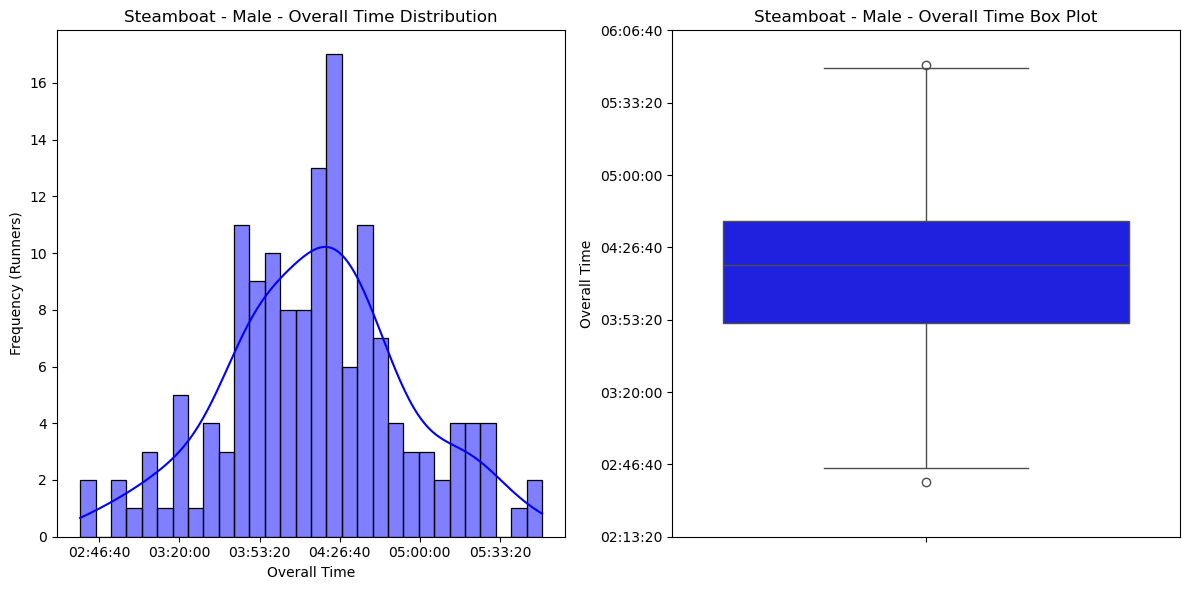

C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2025958772.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)
C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2025958772.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


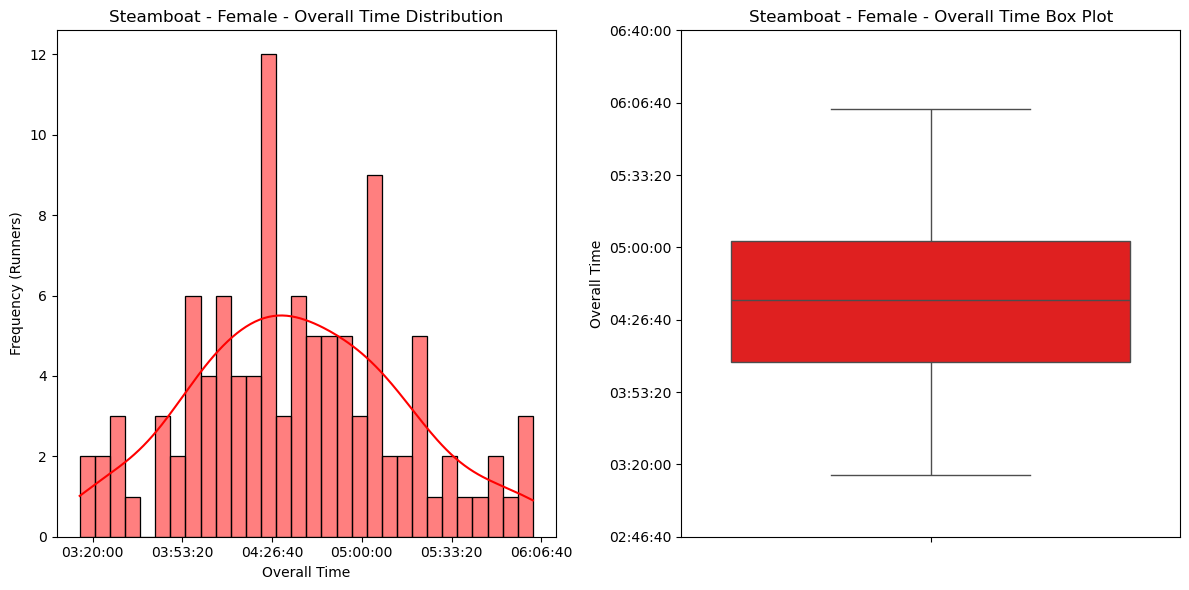

C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2025958772.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)
C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2025958772.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


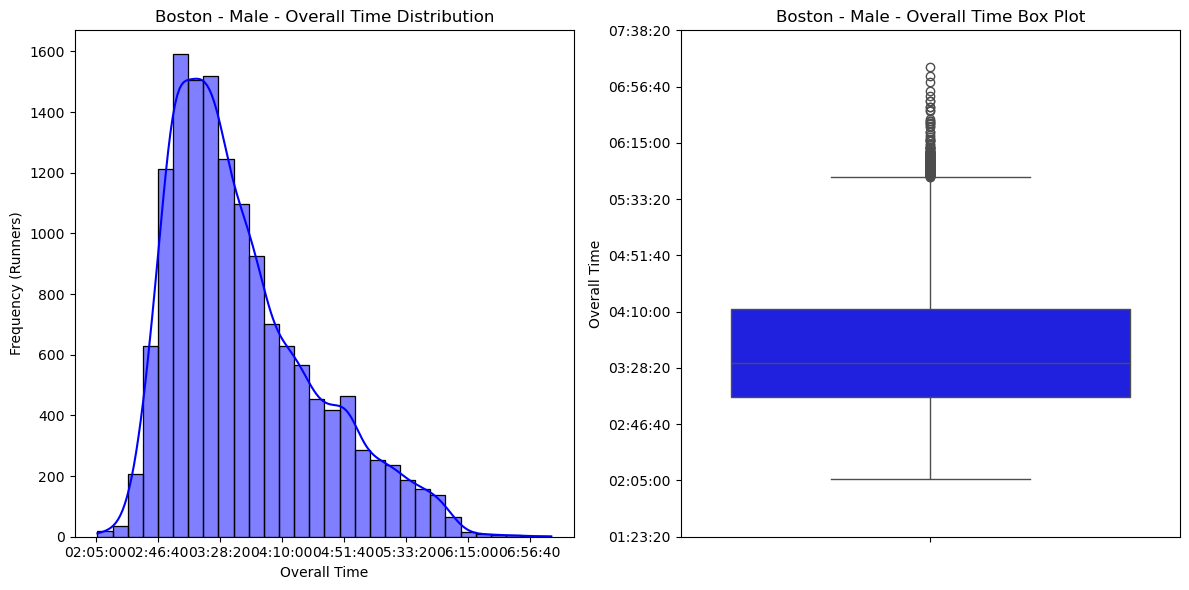

C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2025958772.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)
C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2025958772.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


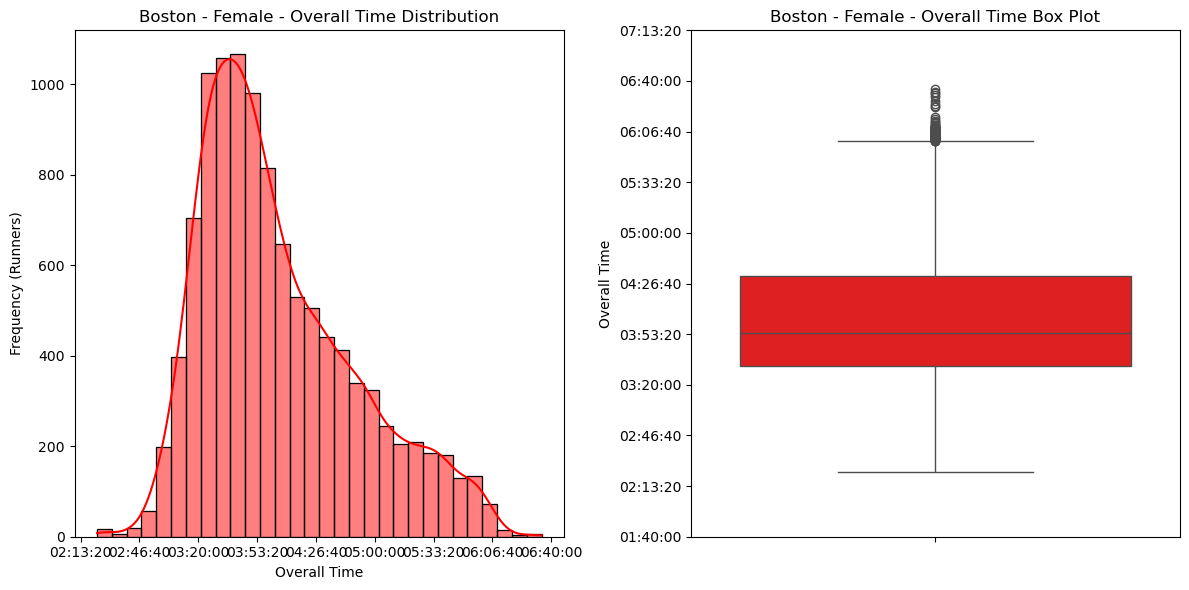

In [68]:

visualize_distributions(steamboat_male, "Steamboat", "Male", "blue", "Overall Time")
visualize_distributions(steamboat_female, "Steamboat", "Female", "red", "Overall Time")
visualize_distributions(boston_male, "Boston", "Male", "blue", "Overall Time")
visualize_distributions(boston_female, "Boston", "Female", "red", "Overall Time")

In [69]:

def load_elevation_data(steamboat_gpx_path, boston_gpx_path):
    """Loads elevation data from GPX files for Steamboat and Boston Marathons."""

    steamboat_elevation_df = get_elevation_data_single(steamboat_gpx_path, "Steamboat")
    boston_elevation_df = get_elevation_data_single(boston_gpx_path, "Boston")

    return steamboat_elevation_df, boston_elevation_df

def get_elevation_data_single(gpx_file_path, race_name):
    """Loads elevation data from a single GPX file."""
    try:
        with open(gpx_file_path, 'r') as f:
            gpx = gpxpy.parse(f)

        elevation_data = []
        distance_data = [0.0]
        total_distance = 0.0
        previous_point = None

        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    elevation_data.append(point.elevation)
                    if previous_point:
                        segment_distance = gpxpy.geo.haversine_distance(
                            point.latitude, point.longitude,
                            previous_point.latitude, previous_point.longitude
                        )
                        total_distance += segment_distance
                        distance_data.append(total_distance)
                    previous_point = point

        # Convert distance to miles
        distance_miles = [dist / 1609.34 for dist in distance_data]

        return pd.DataFrame({'distance_miles': distance_miles, 'elevation_meters': elevation_data, 'race': race_name})

    except FileNotFoundError:
        print(f"Error: GPX file not found at {gpx_file_path}")
        return None
    except gpxpy.gpx.GPXParseException as e:
        print(f"Error parsing GPX file: {e}")
        return None

# Specify the paths to your GPX files
steamboat_gpx_file = r"C:\Users\steph\Downloads\Steamboat Springs Marathon.gpx"
boston_gpx_file = r"C:\Users\steph\Downloads\gpx_20240415_id8675_race1_20240125224011.gpx"

# Load the elevation data for both races
steamboat_elevation_df, boston_elevation_df = load_elevation_data(steamboat_gpx_file, boston_gpx_file)

if steamboat_elevation_df is not None:
    print("\nSteamboat Elevation Data:")
    print(steamboat_elevation_df.head())

if boston_elevation_df is not None:
    print("\nBoston Elevation Data:")
    print(boston_elevation_df.head())


Steamboat Elevation Data:
   distance_miles  elevation_meters       race
0        0.000000            2469.0  Steamboat
1        0.059830            2470.0  Steamboat
2        0.191684            2473.0  Steamboat
3        0.297665            2477.0  Steamboat
4        0.367802            2481.0  Steamboat

Boston Elevation Data:
   distance_miles  elevation_meters    race
0        0.000000             144.0  Boston
1        0.021779             137.0  Boston
2        0.084264             131.0  Boston
3        0.146218             124.0  Boston
4        0.174668             113.0  Boston


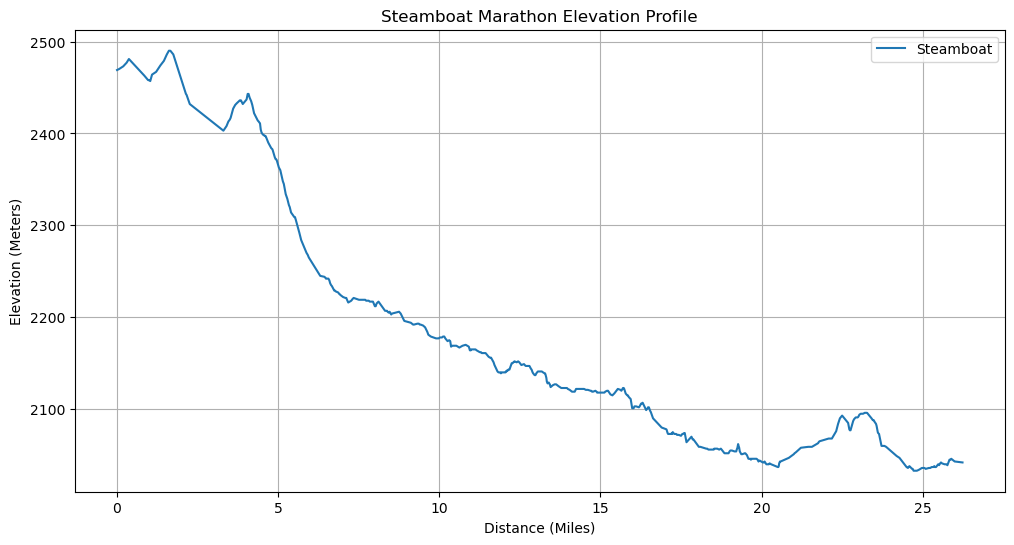

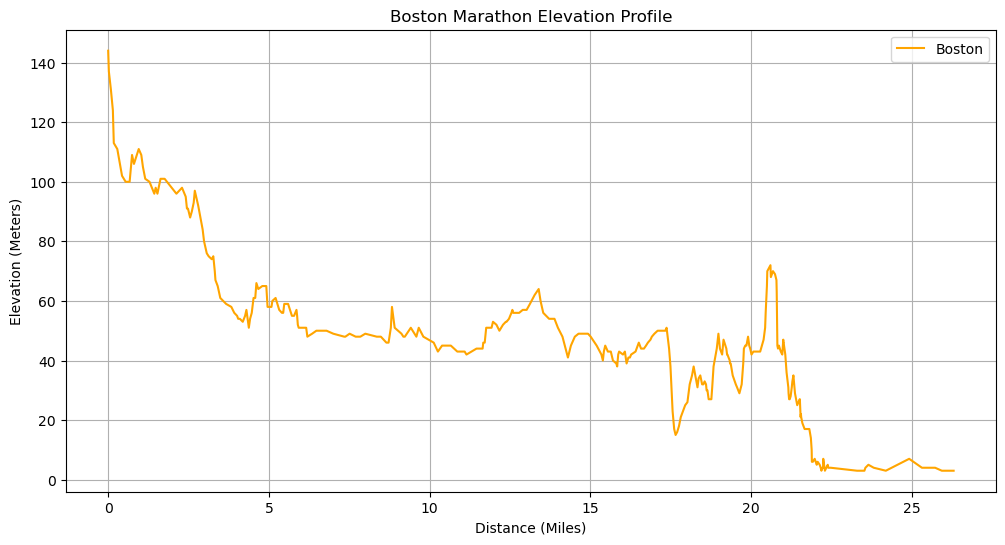

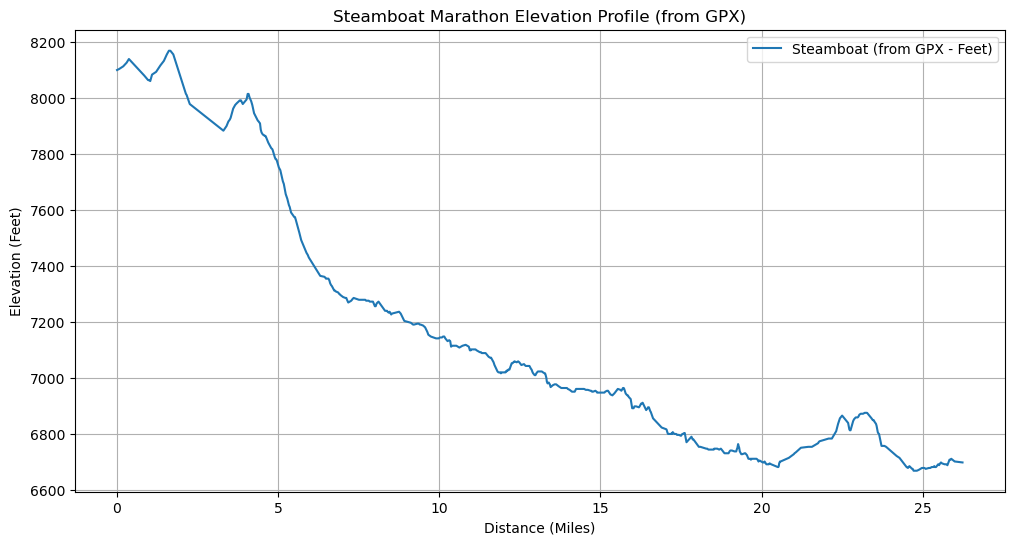

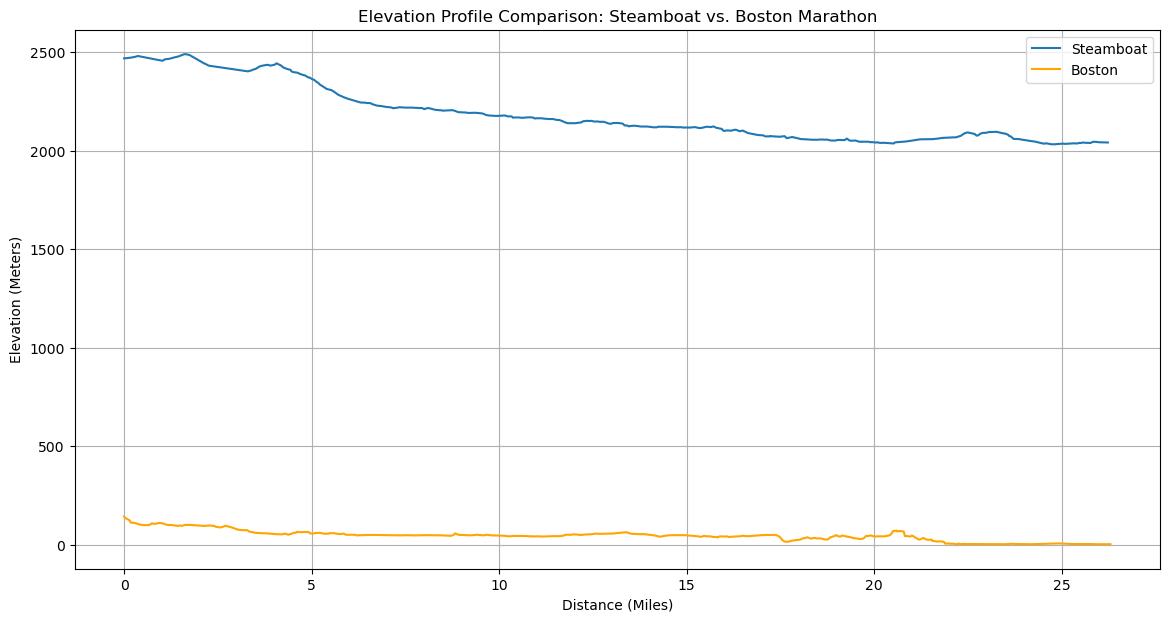

In [70]:
if steamboat_elevation_df is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(steamboat_elevation_df['distance_miles'], steamboat_elevation_df['elevation_meters'], label='Steamboat')
    plt.xlabel("Distance (Miles)")
    plt.ylabel("Elevation (Meters)")
    plt.title("Steamboat Marathon Elevation Profile")
    plt.grid(True)
    plt.legend()
    plt.show()

if boston_elevation_df is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(boston_elevation_df['distance_miles'], boston_elevation_df['elevation_meters'], label='Boston', color='orange')
    plt.xlabel("Distance (Miles)")
    plt.ylabel("Elevation (Meters)")
    plt.title("Boston Marathon Elevation Profile")
    plt.grid(True)
    plt.legend()
    plt.show()

if steamboat_elevation_df is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(steamboat_elevation_df['distance_miles'], steamboat_elevation_df['elevation_meters'] * 3.28084, label='Steamboat (from GPX - Feet)')
    plt.xlabel("Distance (Miles)")
    plt.ylabel("Elevation (Feet)")
    plt.title("Steamboat Marathon Elevation Profile (from GPX)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Optional: Combine both profiles on the same plot for direct comparison
if steamboat_elevation_df is not None and boston_elevation_df is not None:
    plt.figure(figsize=(14, 7))
    plt.plot(steamboat_elevation_df['distance_miles'], steamboat_elevation_df['elevation_meters'], label='Steamboat')
    plt.plot(boston_elevation_df['distance_miles'], boston_elevation_df['elevation_meters'], label='Boston', color='orange')
    plt.xlabel("Distance (Miles)")
    plt.ylabel("Elevation (Meters)")
    plt.title("Elevation Profile Comparison: Steamboat vs. Boston Marathon")
    plt.grid(True)
    plt.legend()
    plt.show()


--- Initial Data Inspection ---
             name  bib gender  overall_time_ms overall_time_readable  \
0     Calvin Lehn  263      M          9522000               2:38:42   
1     Brian Lozes  450      M          9896000               2:44:56   
2   Liam Driscoll  166      M         10412000               2:53:32   
3  Richard Powell  344      M         10533000               2:55:33   
4   Nicholas Cady  137      M         11005000               3:03:25   

  Full Course 13.1 Miles  
0     2:38:41    1:17:46  
1     2:44:55    1:17:57  
2     2:53:31    1:21:25  
3     2:55:32    1:21:55  
4     3:03:23    1:26:22  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   254 non-null    object
 1   bib                    254 non-null    int64 
 2   gender                 254 non-null    object
 3   overall_

C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2022138010.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


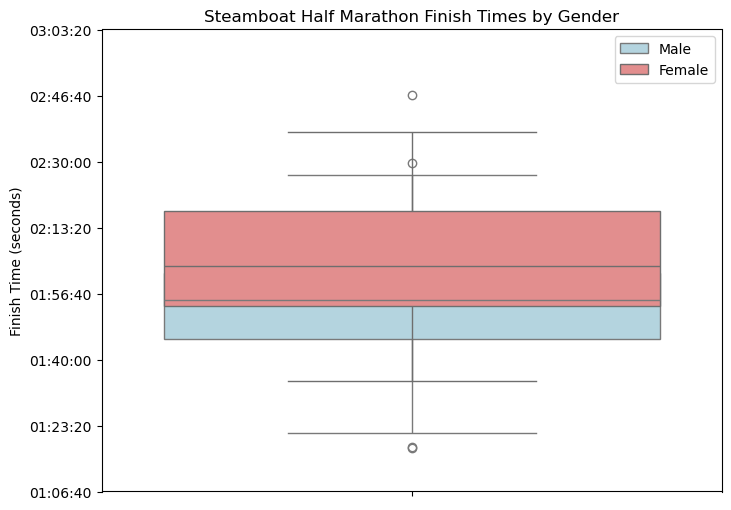

C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2022138010.py:141: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)



Debugging Steamboat Full Marathon Times (after conversion):

Steamboat Full Marathon:
Male Mean: 0 days 04:16:44.181208053
Female Mean: 0 days 04:35:54.323809523


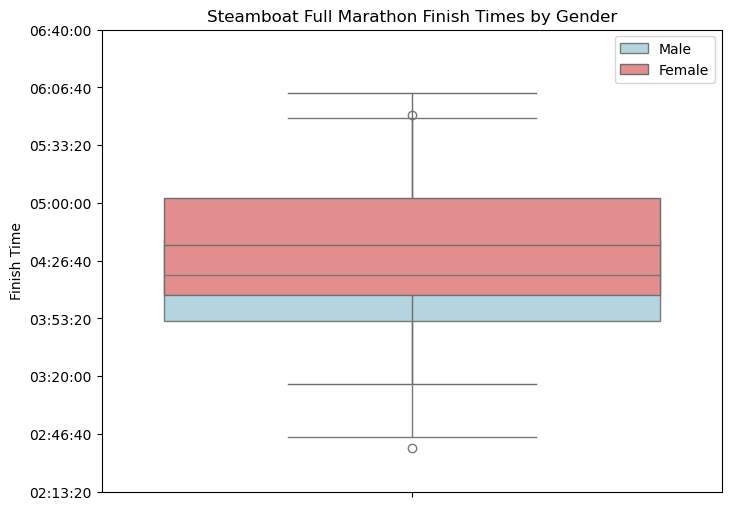


--- Boston Marathon - Gender Comparisons ---

Boston Half Marathon data (based on 'Half_Cleaned' split) not available for comparison.

Boston Full Marathon:
Male Mean: 0 days 03:43:58.629784606
Female Mean: 0 days 04:05:17.660688140


C:\Users\steph\AppData\Local\Temp\ipykernel_13208\2022138010.py:201: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


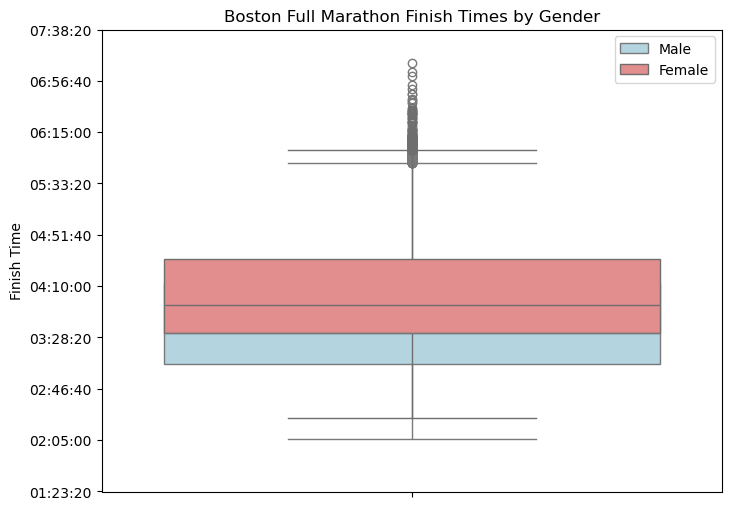

In [71]:
def safe_to_timedelta(time_value):
    """Safely converts a time value to a pandas Timedelta."""
    try:
        return pd.to_timedelta(time_value)
    except ValueError:
        print(f"Warning: Could not convert '{time_value}' to timedelta.")
        return pd.NaT

def timedelta_to_hms(td):
    """Converts a timedelta object to HH:MM:SS format."""
    total_seconds = int(td.total_seconds())
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    return f"{hours:02}:{minutes:02}:{seconds:02}"

def clean_time_string(time_str):
    """Cleans a time string to HH:MM:SS format (very targeted)."""
    if isinstance(time_str, str):
        time_str = time_str.strip()  # Remove leading/trailing whitespace
        parts = time_str.split(':')
        if len(parts) == 3:
            return time_str  # Already in HH:MM:SS
        elif len(parts) == 2:
            return f"00:{time_str}"  # Pad with hours
        elif len(parts) == 1:
            return f"00:00:{time_str}"  # Pad with hours and minutes
        else:
            return None  # Invalid format
    return None

# --- Load Data ---
file_path = r"C:\Users\Steph\OneDrive\Desktop\steamboat_race_results.csv"
steamboat_df = pd.read_csv(file_path)

# --- Initial Data Inspection (KEEP FOR DEBUGGING) ---
print("\n--- Initial Data Inspection ---")
print(steamboat_df.head())
print(steamboat_df.info())
print(steamboat_df['13.1 Miles'].sample(20))
print(type(steamboat_df['13.1 Miles'].iloc[0]))
print("--- End Initial Data Inspection ---")

# --- Steamboat Comparisons ---
print("\n--- Steamboat Marathon - Gender Comparisons ---")

# Half Marathon
if '13.1 Miles' in steamboat_df.columns:
    # Explicit String Conversion
    steamboat_df['13.1 Miles'] = steamboat_df['13.1 Miles'].astype(str)

    # Clean and convert to timedelta
    steamboat_df['13.1 Miles'] = steamboat_df['13.1 Miles'].apply(clean_time_string)
    steamboat_df.dropna(subset=['13.1 Miles'], inplace=True)
    steamboat_df['13.1 Miles'] = pd.to_timedelta(steamboat_df['13.1 Miles'], errors='coerce')  # errors='coerce'
    steamboat_df.dropna(subset=['13.1 Miles'], inplace=True)

    # Force Timedelta and check dtype
    if steamboat_df['13.1 Miles'].dtype != 'timedelta64[ns]':
        raise ValueError("Failed to convert '13.1 Miles' to timedelta64[ns]")

    # Explicitly create Series from Timedelta values
    steamboat_half_male_times = pd.Series([time for time in steamboat_male['13.1 Miles']], dtype='timedelta64[ns]')
    steamboat_half_female_times = pd.Series([time for time in steamboat_female['13.1 Miles']], dtype='timedelta64[ns]')

    # --- DEBUGGING ---
    print("\nDebugging Steamboat Half Marathon Male Times (after conversion):")
    for i, time_value in steamboat_half_male_times.items():
        if not isinstance(time_value, pd.Timedelta):
            print(f"  Index: {i}, Value: '{time_value}', Type: {type(time_value)}")
    # --- END DEBUGGING ---

    print("\nSteamboat Half Marathon:")
    try:
        print(f"Male Mean: {steamboat_half_male_times.mean()}")
        print(f"Female Mean: {steamboat_half_female_times.mean()}")
    except TypeError as e:
        print(f"TypeError in mean calculation: {e}")

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(y=steamboat_half_male_times.dt.total_seconds(), color='lightblue', label='Male')
    sns.boxplot(y=steamboat_half_female_times.dt.total_seconds(), color='lightcoral', label='Female')
    plt.ylabel("Finish Time (seconds)")
    plt.title("Steamboat Half Marathon Finish Times by Gender")
    plt.legend()

    # Format y-axis labels manually
    y_ticks = ax.get_yticks()
    y_labels = [timedelta_to_hms(pd.to_timedelta(tick, unit='s')) for tick in y_ticks]
    ax.set_yticklabels(y_labels)
    ax.set_yticks(y_ticks)

    plt.show()

# Full Marathon
if 'Full Course' in steamboat_df.columns:
    # Explicit String Conversion
    steamboat_df['Full Course'] = steamboat_df['Full Course'].astype(str)

    # Clean and convert to timedelta
    steamboat_df['Full Course'] = steamboat_df['Full Course'].apply(clean_time_string)
    steamboat_df.dropna(subset=['Full Course'], inplace=True)
    try:
        steamboat_df['Full Course_timedelta'] = pd.to_timedelta(steamboat_df['Full Course'], errors='raise')  # errors='raise' for debugging
    except ValueError as e:
        print(f"\nValueError during pd.to_timedelta (Full Course): {e}")
        print("Problematic values:")
        print(steamboat_df['Full Course'][pd.to_timedelta(steamboat_df['Full Course'], errors='coerce').isna()])
        raise  # Re-raise the exception to stop execution
    steamboat_df.dropna(subset=['Full Course_timedelta'], inplace=True)
    steamboat_df.drop(columns=['Full Course'], inplace=True)
    steamboat_df.rename(columns={'Full Course_timedelta': 'Full Course'}, inplace=True)

    steamboat_full_male_times = pd.Series(steamboat_male['Full Course'], dtype='timedelta64[ns]')
    steamboat_full_female_times = pd.Series(steamboat_female['Full Course'], dtype='timedelta64[ns]')

    # --- DEBUGGING ---
    print("\nDebugging Steamboat Full Marathon Times (after conversion):")
    for i, time_value in steamboat_full_male_times.items():
        if not isinstance(time_value, pd.Timedelta):
            print(f"  Index: {i}, Value: '{time_value}', Type: {type(time_value)}")
    # --- END DEBUGGING ---

    print("\nSteamboat Full Marathon:")
    try:
        print(f"Male Mean: {steamboat_full_male_times.mean()}")
        print(f"Female Mean: {steamboat_full_female_times.mean()}")
    except TypeError as e:
        print(f"TypeError in mean calculation: {e}")

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(y=steamboat_full_male_times.dt.total_seconds(), color='lightblue', label='Male')
    sns.boxplot(y=steamboat_full_female_times.dt.total_seconds(), color='lightcoral', label='Female')
    plt.ylabel("Finish Time")
    plt.title("Steamboat Full Marathon Finish Times by Gender")
    plt.legend()

    # Format y-axis labels manually
    y_ticks = ax.get_yticks()
    y_labels = [timedelta_to_hms(pd.to_timedelta(tick, unit='s')) for tick in y_ticks]
    ax.set_yticklabels(y_labels)
    ax.set_yticks(y_ticks)

    plt.show()

# --- Boston Comparisons ---
print("\n--- Boston Marathon - Gender Comparisons ---")

# Half Marathon
if 'Half_Cleaned' in boston_male.columns and 'Half_Cleaned' in boston_female.columns:
    # 'Half_Cleaned' should already be timedelta, but let's be safe
    boston_half_male_times = boston_male['Half_Cleaned'].apply(safe_to_timedelta)
    boston_half_male_times.dropna(inplace=True)
    boston_half_male_times = pd.to_timedelta(boston_half_male_times)

    boston_half_female_times = boston_female['Half_Cleaned'].apply(safe_to_timedelta)
    boston_half_female_times.dropna(inplace=True)
    boston_half_female_times = pd.to_timedelta(boston_half_female_times)

    print("\nBoston Half Marathon (Based on Cleaned Split Time):")
    print(f"Male Mean: {boston_half_male_times.mean()}")
    print(f"Female Mean: {boston_half_female_times.mean()}")

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(y=boston_half_male_times.dt.total_seconds(), color='lightblue', label='Male')
    sns.boxplot(y=boston_half_female_times.dt.total_seconds(), color='lightcoral', label='Female')
    plt.ylabel("Half Marathon Split Time")
    plt.title("Boston Half Marathon Split Times by Gender (Cleaned)")
    plt.legend()

    # Format y-axis labels manually
    y_ticks = ax.get_yticks()
    y_labels = [timedelta_to_hms(pd.to_timedelta(tick, unit='s')) for tick in y_ticks]
    ax.set_yticklabels(y_labels)
    ax.set_yticks(y_ticks)

    plt.show()
else:
    print("\nBoston Half Marathon data (based on 'Half_Cleaned' split) not available for comparison.")

# Full Marathon
if 'Overall Time' in boston_male.columns and 'Overall Time' in boston_female.columns:
    # 'Overall Time' should already be timedelta
    boston_full_male_times = boston_male['Overall Time']
    boston_full_female_times = boston_female['Overall Time']

    print("\nBoston Full Marathon:")
    print(f"Male Mean: {boston_full_male_times.mean()}")
    print(f"Female Mean: {boston_full_female_times.mean()}")

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(y=boston_full_male_times.dt.total_seconds(), color='lightblue', label='Male')
    sns.boxplot(y=boston_full_female_times.dt.total_seconds(), color='lightcoral', label='Female')
    plt.ylabel("Finish Time")
    plt.title("Boston Full Marathon Finish Times by Gender")
    plt.legend()

    # Format y-axis labels manually
    y_ticks = ax.get_yticks()
    y_labels = [timedelta_to_hms(pd.to_timedelta(tick, unit='s')) for tick in y_ticks]
    ax.set_yticklabels(y_labels)
    ax.set_yticks(y_ticks)

    plt.show()
else:
    print("\nBoston Full Marathon data (based on 'Overall Time') not available for comparison.")


--- Half Marathon Comparison (Steamboat vs. Boston) ---
Boston Half Marathon data not available for comparison.

Overall Half Marathon Statistics (Steamboat vs. Boston):
                 count unique      top freq
Race      Gender                           
Steamboat Female   105    102  2:34:31    2
          Male     149    142  1:43:02    2


C:\Users\steph\AppData\Local\Temp\ipykernel_13208\3067523428.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)  # Set formatted labels


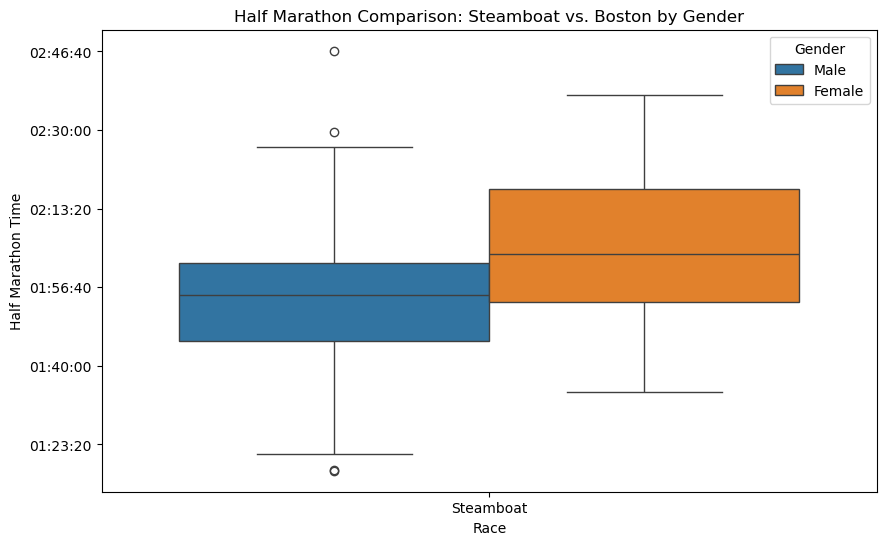


--- Full Marathon Comparison (Steamboat vs. Boston) ---

Overall Full Marathon Statistics (Steamboat vs. Boston):
                  count unique              top freq
Race      Gender                                    
Boston    Female  10928   6174  0 days 03:48:29    9
          Male    14578   7559  0 days 03:37:50    9
Steamboat Female    105    103          4:07:01    2
          Male      149    144          4:10:42    2


C:\Users\steph\AppData\Local\Temp\ipykernel_13208\3067523428.py:93: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(full_marathon_comparison_df.groupby(['Race', 'Gender'])['Time'].describe())
C:\Users\steph\AppData\Local\Temp\ipykernel_13208\3067523428.py:93: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(full_marathon_comparison_df.groupby(['Race', 'Gender'])['Time'].describe())
C:\Users\steph\AppData\Local\Temp\ipykernel_13208\3067523428.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabel

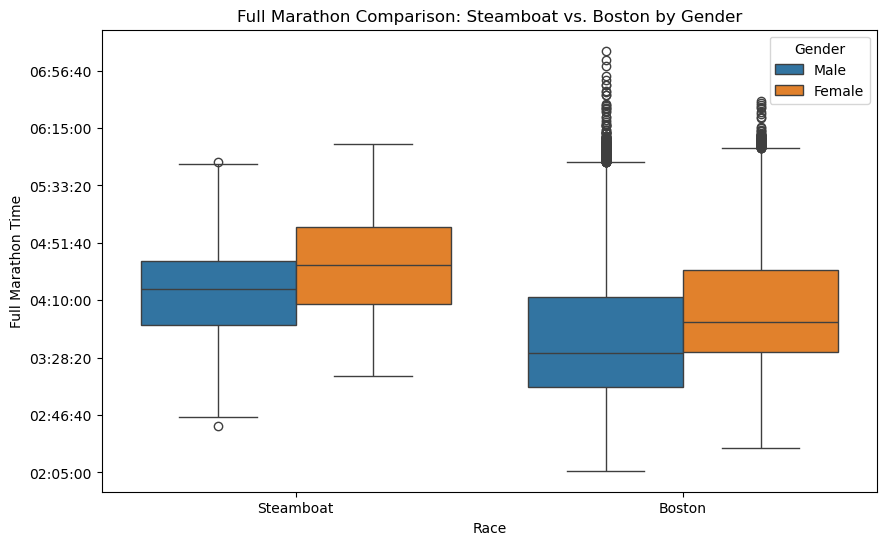

In [72]:
def safe_to_timedelta(time_value):
    """Safely converts a time value to a pandas Timedelta."""
    try:
        return pd.to_timedelta(time_value)
    except ValueError:
        print(f"Warning: Could not convert '{time_value}' to timedelta.")
        return pd.NaT

def timedelta_to_hms(td):
    """Converts a timedelta object to HH:MM:SS format."""
    total_seconds = int(td.total_seconds())
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# --- Half Marathon Comparison (Steamboat vs. Boston) ---
print("\n--- Half Marathon Comparison (Steamboat vs. Boston) ---")

# Create DataFrames for half marathon comparison
if '13.1 Miles' in steamboat_male.columns and '13.1 Miles' in steamboat_female.columns:
    steamboat_half_male_df = pd.DataFrame({'Time': steamboat_male['13.1 Miles'], 'Race': 'Steamboat', 'Gender': 'Male'})
    steamboat_half_female_df = pd.DataFrame({'Time': steamboat_female['13.1 Miles'], 'Race': 'Steamboat', 'Gender': 'Female'})
else:
    print("Steamboat Half Marathon data not available for comparison.")
    steamboat_half_male_df = pd.DataFrame()
    steamboat_half_female_df = pd.DataFrame()

if 'Half_Cleaned' in boston_male.columns and 'Half_Cleaned' in boston_female.columns:
    boston_half_male_df = pd.DataFrame({'Time': boston_male['Half_Cleaned'], 'Race': 'Boston', 'Gender': 'Male'})
    boston_half_female_df = pd.DataFrame({'Time': boston_female['Half_Cleaned'], 'Race': 'Boston', 'Gender': 'Female'})
else:
    print("Boston Half Marathon data not available for comparison.")
    boston_half_male_df = pd.DataFrame()
    boston_half_female_df = pd.DataFrame()

# Concatenate the DataFrames
half_marathon_comparison_df = pd.concat([steamboat_half_male_df, steamboat_half_female_df, boston_half_male_df, boston_half_female_df], ignore_index=True)
half_marathon_comparison_df.dropna(subset=['Time'], inplace=True)

# Calculate and print overall statistics
print("\nOverall Half Marathon Statistics (Steamboat vs. Boston):")
print(half_marathon_comparison_df.groupby(['Race', 'Gender'])['Time'].describe())

# Visualize with box plots
if not half_marathon_comparison_df.empty:
    # Explicitly convert 'Time' to numeric (seconds)
    half_marathon_comparison_df['Time_Seconds'] = half_marathon_comparison_df['Time'].apply(lambda x: x.total_seconds() if isinstance(x, pd.Timedelta) else pd.to_timedelta(x, errors='coerce').total_seconds())
    half_marathon_comparison_df.dropna(subset=['Time_Seconds'], inplace=True)

    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Race', y='Time_Seconds', hue='Gender', data=half_marathon_comparison_df)  # Keep hue for comparison
    plt.title("Half Marathon Comparison: Steamboat vs. Boston by Gender")
    plt.ylabel("Half Marathon Time")

    # --- FORMAT Y-AXIS LABELS ---
    ax = plt.gca()  # Get current axes
    y_ticks = ax.get_yticks()  # Get y-axis tick positions
    y_labels = [timedelta_to_hms(pd.to_timedelta(tick, unit='s')) for tick in y_ticks]  # Format labels
    ax.set_yticklabels(y_labels)  # Set formatted labels
    # --- END FORMAT Y-AXIS LABELS ---

    plt.show()
else:
    print("Insufficient data to visualize Half Marathon comparison.")

# --- Full Marathon Comparison (Steamboat vs. Boston) ---
print("\n--- Full Marathon Comparison (Steamboat vs. Boston) ---")

# Create DataFrames for full marathon comparison
if 'Full Course' in steamboat_male.columns and 'Full Course' in steamboat_female.columns:
    steamboat_full_male_df = pd.DataFrame({'Time': steamboat_male['Full Course'], 'Race': 'Steamboat', 'Gender': 'Male'})
    steamboat_full_female_df = pd.DataFrame({'Time': steamboat_female['Full Course'], 'Race': 'Steamboat', 'Gender': 'Female'})
else:
    print("Steamboat Full Marathon data not available for comparison.")
    steamboat_full_male_df = pd.DataFrame()
    steamboat_full_female_df = pd.DataFrame()

if 'Overall Time' in boston_male.columns and 'Overall Time' in boston_female.columns:
    boston_full_male_df = pd.DataFrame({'Time': boston_male['Overall Time'], 'Race': 'Boston', 'Gender': 'Male'})
    boston_full_female_df = pd.DataFrame({'Time': boston_female['Overall Time'], 'Race': 'Boston', 'Gender': 'Female'})
else:
    print("Boston Full Marathon data not available for comparison.")
    boston_full_male_df = pd.DataFrame()
    boston_full_female_df = pd.DataFrame()

# Concatenate the DataFrames
full_marathon_comparison_df = pd.concat([steamboat_full_male_df, steamboat_full_female_df, boston_full_male_df, boston_full_female_df], ignore_index=True)
full_marathon_comparison_df.dropna(subset=['Time'], inplace=True)

# Calculate and print overall statistics
print("\nOverall Full Marathon Statistics (Steamboat vs. Boston):")
print(full_marathon_comparison_df.groupby(['Race', 'Gender'])['Time'].describe())

# Visualize with box plots
if not full_marathon_comparison_df.empty:
    # Explicitly convert 'Time' to numeric (seconds)
    full_marathon_comparison_df['Time_Seconds'] = full_marathon_comparison_df['Time'].apply(lambda x: x.total_seconds() if isinstance(x, pd.Timedelta) else pd.to_timedelta(x, errors='coerce').total_seconds())
    full_marathon_comparison_df.dropna(subset=['Time_Seconds'], inplace=True)

    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Race', y='Time_Seconds', hue='Gender', data=full_marathon_comparison_df)  # Keep hue for comparison
    plt.title("Full Marathon Comparison: Steamboat vs. Boston by Gender")
    plt.ylabel("Full Marathon Time")

    # --- FORMAT Y-AXIS LABELS ---
    ax = plt.gca()  # Get current axes
    y_ticks = ax.get_yticks()  # Get y-axis tick positions
    y_labels = [timedelta_to_hms(pd.to_timedelta(tick, unit='s')) for tick in y_ticks]  # Format labels
    ax.set_yticklabels(y_labels)  # Set formatted labels
    # --- END FORMAT Y-AXIS LABELS ---

    plt.show()
else:
    print("Insufficient data to visualize Full Marathon comparison.")

In [73]:
from scipy import stats

print("\n--- Statistical Tests ---")

alpha = 0.05  # Significance level

def safe_to_timedelta(time_value):
    """Safely converts a time value to a pandas Timedelta."""
    try:
        return pd.to_timedelta(time_value)
    except ValueError:
        print(f"Warning: Could not convert '{time_value}' to timedelta.")
        return pd.NaT

def clean_time_string(time_str):
    """Cleans a time string to HH:MM:SS format (very targeted)."""
    if isinstance(time_str, str):
        time_str = time_str.strip()  # Remove leading/trailing whitespace
        parts = time_str.split(':')
        if len(parts) == 3:
            return time_str  # Already in HH:MM:SS
        elif len(parts) == 2:
            return f"00:{time_str}"  # Pad with hours
        elif len(parts) == 1:
            return f"00:00:{time_str}"  # Pad with hours and minutes
        else:
            return None  # Invalid format
    return None

# --- Half Marathon Comparison ---
print("\n--- Half Marathon ---")

# Male
if '13.1 Miles' in steamboat_male.columns and 'Half_Cleaned' in boston_male.columns:
    try:
        # Corrected Half Marathon Time Conversion
        steamboat_male['13.1 Miles'] = steamboat_male['13.1 Miles'].astype(str).apply(clean_time_string)
        steamboat_male['13.1 Miles'] = pd.to_timedelta(steamboat_male['13.1 Miles'], errors='coerce')
        steamboat_male_half_seconds = steamboat_male['13.1 Miles'].dt.total_seconds().dropna()

        boston_male['Half_Cleaned'] = boston_male['Half_Cleaned'].apply(safe_to_timedelta)
        boston_male_half_seconds = boston_male['Half_Cleaned'].dt.total_seconds().dropna()

        if len(steamboat_male_half_seconds) > 1 and len(boston_male_half_seconds) > 1:
            t_stat, p_value = stats.ttest_ind(steamboat_male_half_seconds, boston_male_half_seconds, equal_var=False)  # Welch's t-test
            print(f"\nMale - Steamboat vs. Boston (Half Marathon):")
            print(f"  T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
            if p_value < alpha:
                print("  The difference in mean half marathon times for males is statistically significant.")
            else:
                print("  The difference in mean half marathon times for males is not statistically significant.")
        else:
            print("\nInsufficient data for male half marathon comparison (after conversion).")

    except ValueError as e:
        print(f"\nValueError during Half Marathon male time conversion: {e}")
        print("Check the data in '13.1 Miles' and 'Half_Cleaned' columns.")
    except KeyError as e:
        print(f"\nKeyError: Column not found: {e}")
        print("Ensure '13.1 Miles', 'Half_Cleaned' are in the dataframes.")
else:
    print("\nInsufficient data: Missing '13.1 Miles' or 'Half_Cleaned' columns in male dataframes.")

# Female
if '13.1 Miles' in steamboat_female.columns and 'Half_Cleaned' in boston_female.columns:
    try:
        # Corrected Half Marathon Time Conversion
        steamboat_female['13.1 Miles'] = steamboat_female['13.1 Miles'].astype(str).apply(clean_time_string)
        steamboat_female['13.1 Miles'] = pd.to_timedelta(steamboat_female['13.1 Miles'], errors='coerce')
        steamboat_female_half_seconds = steamboat_female['13.1 Miles'].dt.total_seconds().dropna()

        boston_female['Half_Cleaned'] = boston_female['Half_Cleaned'].apply(safe_to_timedelta)
        boston_female_half_seconds = boston_female['Half_Cleaned'].dt.total_seconds().dropna()

        if len(steamboat_female_half_seconds) > 1 and len(boston_female_half_seconds) > 1:
            t_stat, p_value = stats.ttest_ind(steamboat_female_half_seconds, boston_female_half_seconds, equal_var=False)  # Welch's t-test
            print(f"\nFemale - Steamboat vs. Boston (Half Marathon):")
            print(f"  T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
            if p_value < alpha:
                print("  The difference in mean half marathon times for females is statistically significant.")
            else:
                print("  The difference in mean half marathon times for females is not statistically significant.")
        else:
            print("\nInsufficient data for female half marathon comparison (after conversion).")

    except ValueError as e:
        print(f"\nValueError during Half Marathon female time conversion: {e}")
        print("Check the data in '13.1 Miles' and 'Half_Cleaned' columns.")
    except KeyError as e:
        print(f"\nKeyError: Column not found: {e}")
        print("Ensure '13.1 Miles', 'Half_Cleaned' are in the dataframes.")
else:
    print("\nInsufficient data: Missing '13.1 Miles' or 'Half_Cleaned' columns in female dataframes.")

# --- Full Marathon Comparison ---
print("\n--- Full Marathon ---")

# Male
if 'Full Course' in steamboat_male.columns and 'Overall Time' in boston_male.columns:
    try:
        # Corrected Full Marathon Time Conversion
        steamboat_male['Full Course'] = steamboat_male['Full Course'].astype(str).apply(clean_time_string)
        steamboat_male['Full Course'] = pd.to_timedelta(steamboat_male['Full Course'], errors='coerce')
        steamboat_male_full_seconds = steamboat_male['Full Course'].dt.total_seconds().dropna()

        boston_male['Overall Time'] = boston_male['Overall Time'].apply(safe_to_timedelta)
        boston_male_full_seconds = boston_male['Overall Time'].dt.total_seconds().dropna()

        if len(steamboat_male_full_seconds) > 1 and len(boston_male_full_seconds) > 1:
            t_stat, p_value = stats.ttest_ind(steamboat_male_full_seconds, boston_male_full_seconds, equal_var=False)  # Welch's t-test
            print(f"\nMale - Steamboat vs. Boston (Full Marathon):")
            print(f"  T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
            if p_value < alpha:
                print("  The difference in mean full marathon times for males is statistically significant.")
            else:
                print("  The difference in mean full marathon times for males is not statistically significant.")
        else:
            print("\nInsufficient data for male full marathon comparison (after conversion).")

    except ValueError as e:
        print(f"\nValueError during Full Marathon male time conversion: {e}")
        print("Check the data in 'Full Course' and 'Overall Time' columns.")
    except KeyError as e:
        print(f"\nKeyError: Column not found: {e}")
        print("Ensure 'Full Course' and 'Overall Time' are in the dataframes.")
else:
    print("\nInsufficient data: Missing 'Full Course' or 'Overall Time' columns in male dataframes.")

# Female
if 'Full Course' in steamboat_female.columns and 'Overall Time' in boston_female.columns:
    try:
        # Corrected Full Marathon Time Conversion
        steamboat_female['Full Course'] = steamboat_female['Full Course'].astype(str).apply(clean_time_string)
        steamboat_female['Full Course'] = pd.to_timedelta(steamboat_female['Full Course'], errors='coerce')
        steamboat_female_full_seconds = steamboat_female['Full Course'].dt.total_seconds().dropna()

        boston_female['Overall Time'] = boston_female['Overall Time'].apply(safe_to_timedelta)
        boston_female_full_seconds = boston_female['Overall Time'].dt.total_seconds().dropna()

        if len(steamboat_female_full_seconds) > 1 and len(boston_female_full_seconds) > 1:
            t_stat, p_value = stats.ttest_ind(steamboat_female_full_seconds, boston_female_full_seconds, equal_var=False)  # Welch's t-test
            print(f"\nFemale - Steamboat vs. Boston (Full Marathon):")
            print(f"  T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
            if p_value < alpha:
                print("  The difference in mean full marathon times for females is statistically significant.")
            else:
                print("  The difference in mean full marathon times for females is not statistically significant.")
        else:
            print("\nInsufficient data for female full marathon comparison (after conversion).")

    except ValueError as e:
        print(f"\nValueError during Full Marathon female time conversion: {e}")
        print("Check the data in 'Full Course' and 'Overall Time' columns.")
    except KeyError as e:
        print(f"\nKeyError: Column not found: {e}")
        print("Ensure 'Full Course' and 'Overall Time' are in the dataframes.")
else:
    print("\nInsufficient data: Missing 'Full Course' or 'Overall Time' columns in female dataframes.")


--- Statistical Tests ---

--- Half Marathon ---

Insufficient data: Missing '13.1 Miles' or 'Half_Cleaned' columns in male dataframes.

Insufficient data: Missing '13.1 Miles' or 'Half_Cleaned' columns in female dataframes.

--- Full Marathon ---

Male - Steamboat vs. Boston (Full Marathon):
  T-statistic: 10.461, P-value: 0.000
  The difference in mean full marathon times for males is statistically significant.

Female - Steamboat vs. Boston (Full Marathon):
  T-statistic: 7.977, P-value: 0.000
  The difference in mean full marathon times for females is statistically significant.
